# Regression
simple linear regression

In [1]:

import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
dataset=pd.read_csv("weight-height.csv")

In [3]:
dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


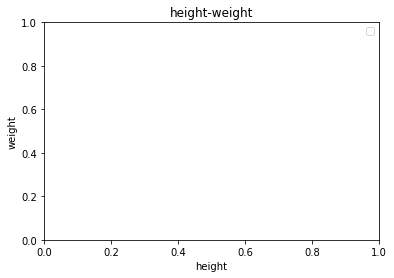

In [5]:
plt.title("height-weight")
plt.xlabel("height")
plt.ylabel("weight")
plt.legend()
plt.show()

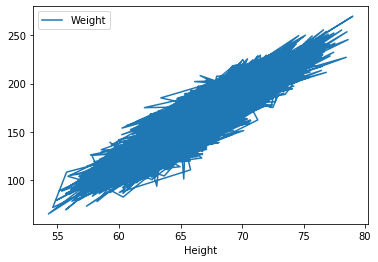

In [6]:
dataset.plot("Height","Weight")


In [7]:
dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [8]:
dataset.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [9]:
x=dataset.iloc[:,1].values.reshape(-1,1)

In [10]:
x

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [11]:
y=dataset.iloc[:,2].values.reshape(-1,1)

In [12]:
y

array([[241.89356318],
       [162.31047252],
       [212.74085556],
       ...,
       [128.47531878],
       [163.85246135],
       [113.64910268]])

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
lr=LinearRegression()

In [15]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred = lr.predict(x_test)
y_pred

array([[148.75558183],
       [168.42149939],
       [224.36258506],
       ...,
       [159.1525448 ],
       [155.83742186],
       [144.79653194]])

# polynomial

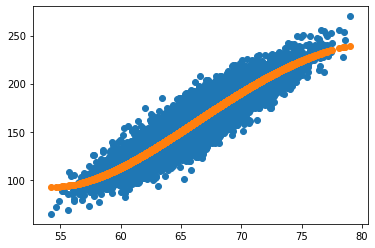

In [17]:

from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 4)
x_poly = pr.fit_transform(x)
pr.fit(x_poly, y)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
plt.scatter(x, y)
plt.scatter(x, lin_reg.predict(pr.fit_transform(x)))
plt.show()

# KNR

In [18]:

from sklearn.neighbors import KNeighborsRegressor

In [20]:
KNR=KNeighborsRegressor(8)
KNR.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [21]:
KNR=KNR.predict(x_test).reshape(-1,1)

In [23]:
KNR

array([[152.27056822],
       [171.56886776],
       [214.0855688 ],
       ...,
       [161.75978789],
       [153.7061422 ],
       [147.49328887]])

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

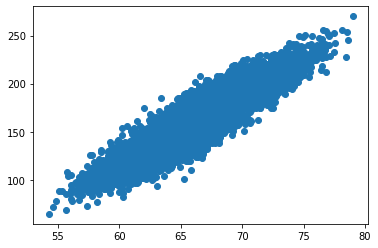

In [26]:
plt.scatter(x, y)
plt.scatter(x, KNR.predict(x))
plt.show()

# DT

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
Regressor=RandomForestRegressor(random_state=0)

In [31]:
Regressor.fit(x,y)

C:\Users\soujanya1234\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

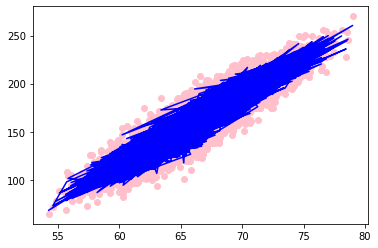

In [43]:

plt.scatter(x,y,color='pink')
plt.plot(x,Regressor.predict(x),color='blue')

In [41]:
y_predict=Regressor.predict(65)
y_predict

ValueError: Expected 2D array, got scalar array instead:
array=65.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.